<a href="https://colab.research.google.com/github/ssachin1454/Health-care/blob/main/health_mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Datsets

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ml/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df = df.iloc[:,2:]

# EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(1000, 24)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [ ]:
def unique(i):
    print("{}".format(i))
    print(df[i].nunique())
    print("-"*50)

for i in df.select_dtypes(exclude="object"):
    unique(i)

Age
40
--------------------------------------------------
Gender
2
--------------------------------------------------
Air Pollution
8
--------------------------------------------------
Alcohol use
8
--------------------------------------------------
Dust Allergy
8
--------------------------------------------------
OccuPational Hazards
8
--------------------------------------------------
Genetic Risk
7
--------------------------------------------------
chronic Lung Disease
7
--------------------------------------------------
Balanced Diet
7
--------------------------------------------------
Obesity
7
--------------------------------------------------
Smoking
8
--------------------------------------------------
Passive Smoker
8
--------------------------------------------------
Chest Pain
9
--------------------------------------------------
Coughing of Blood
9
--------------------------------------------------
Fatigue
8
--------------------------------------------------
Weight Loss
8
---

# Data Visualisation

<Axes: >

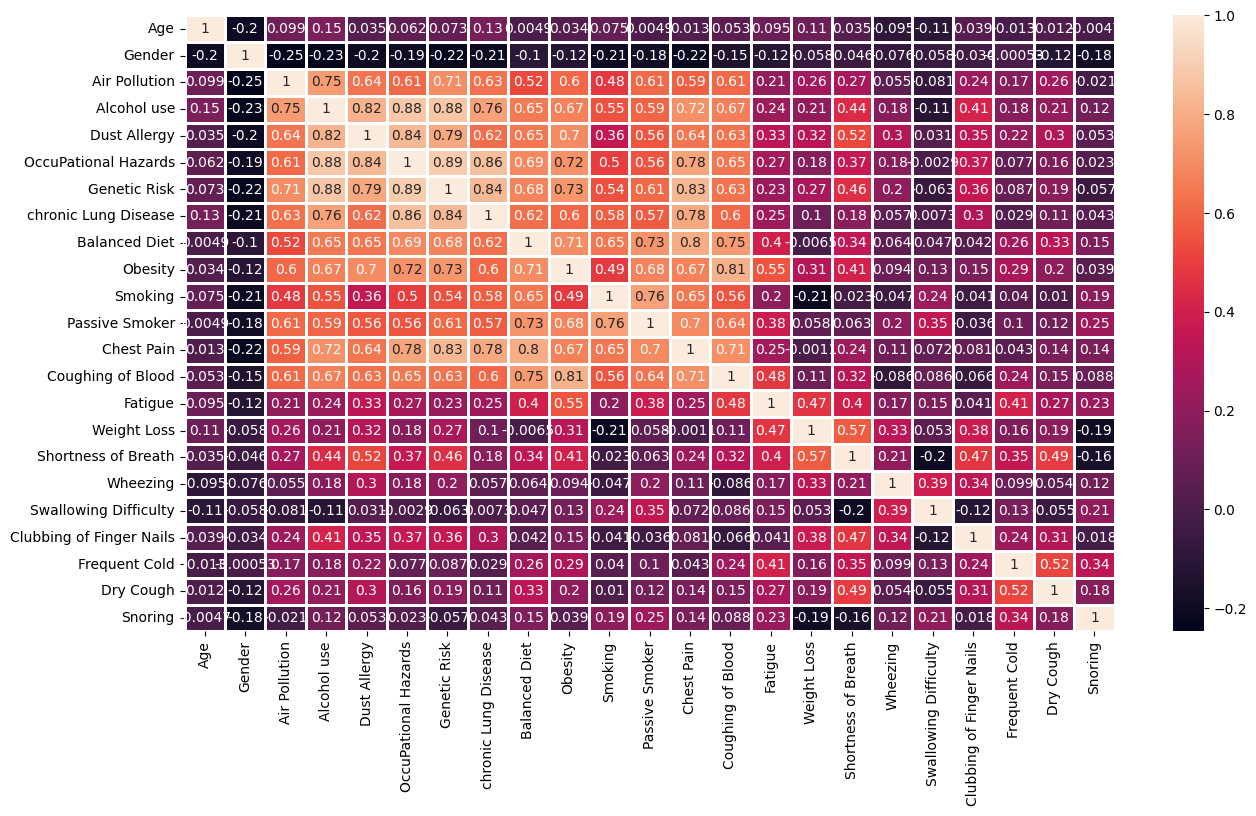

In [ ]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.select_dtypes(include="number").corr(),linewidth = 1, annot = True)

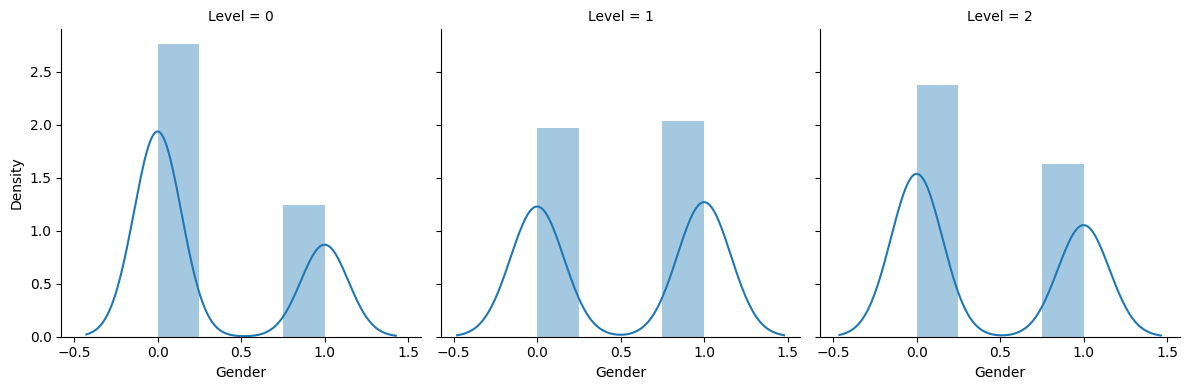

In [ ]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Gender")

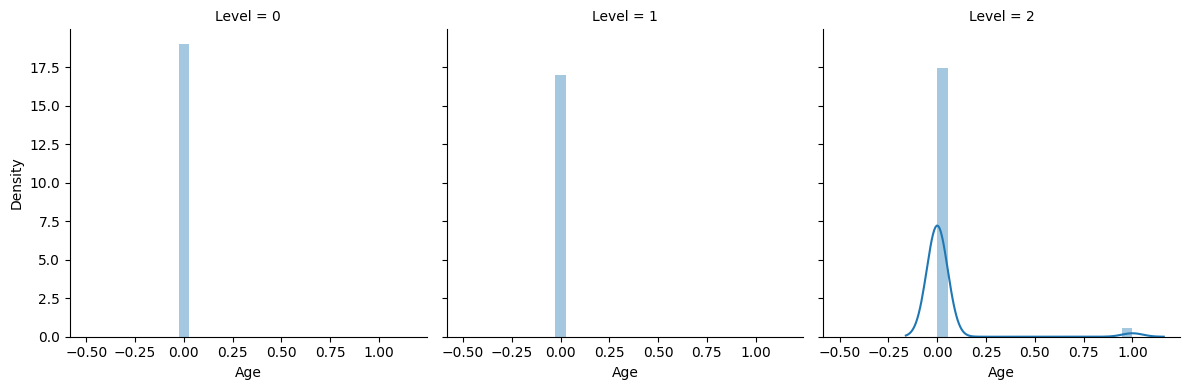

In [ ]:
sea = sns.FacetGrid(df, col = "Level", height = 4)
sea.map(sns.distplot, "Age")

<Axes: title={'center': 'Dataset Details'}>

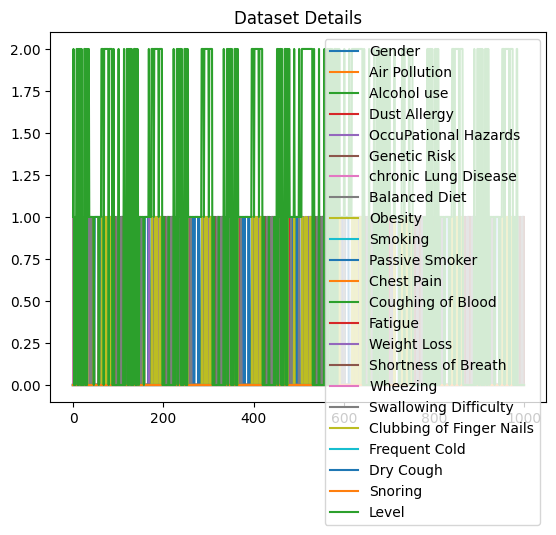

In [ ]:
df.iloc[:, 1:24].plot(title="Dataset Details")

<Axes: >

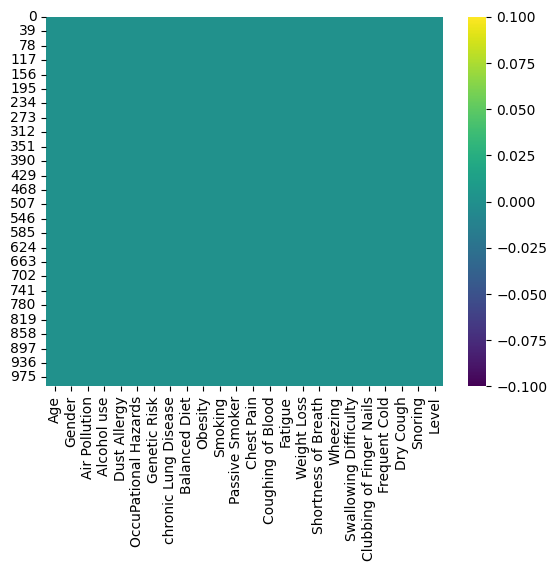

In [ ]:
sns.heatmap(df.isnull(), cmap = 'viridis')

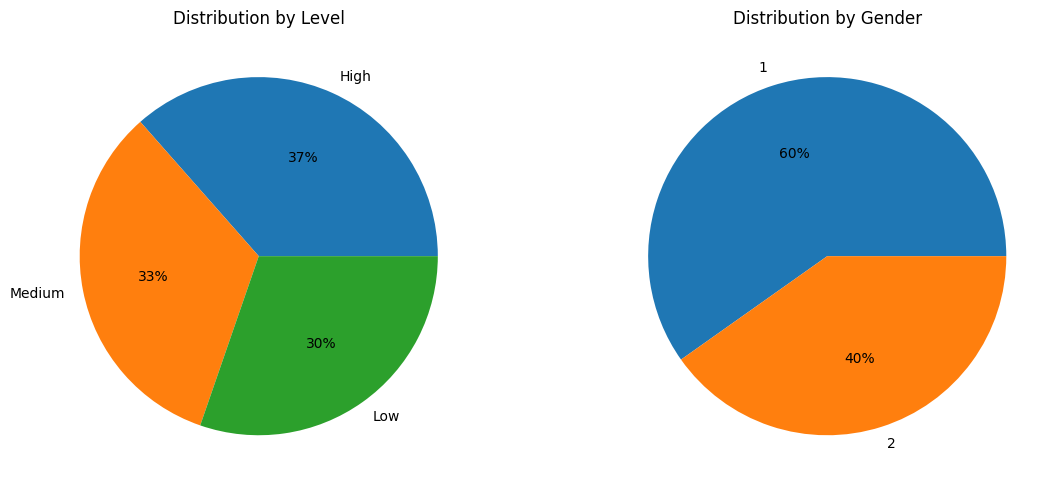

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].pie(df['Level'].value_counts(), labels=df['Level'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Level')

axs[1].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

# Checking Outliers

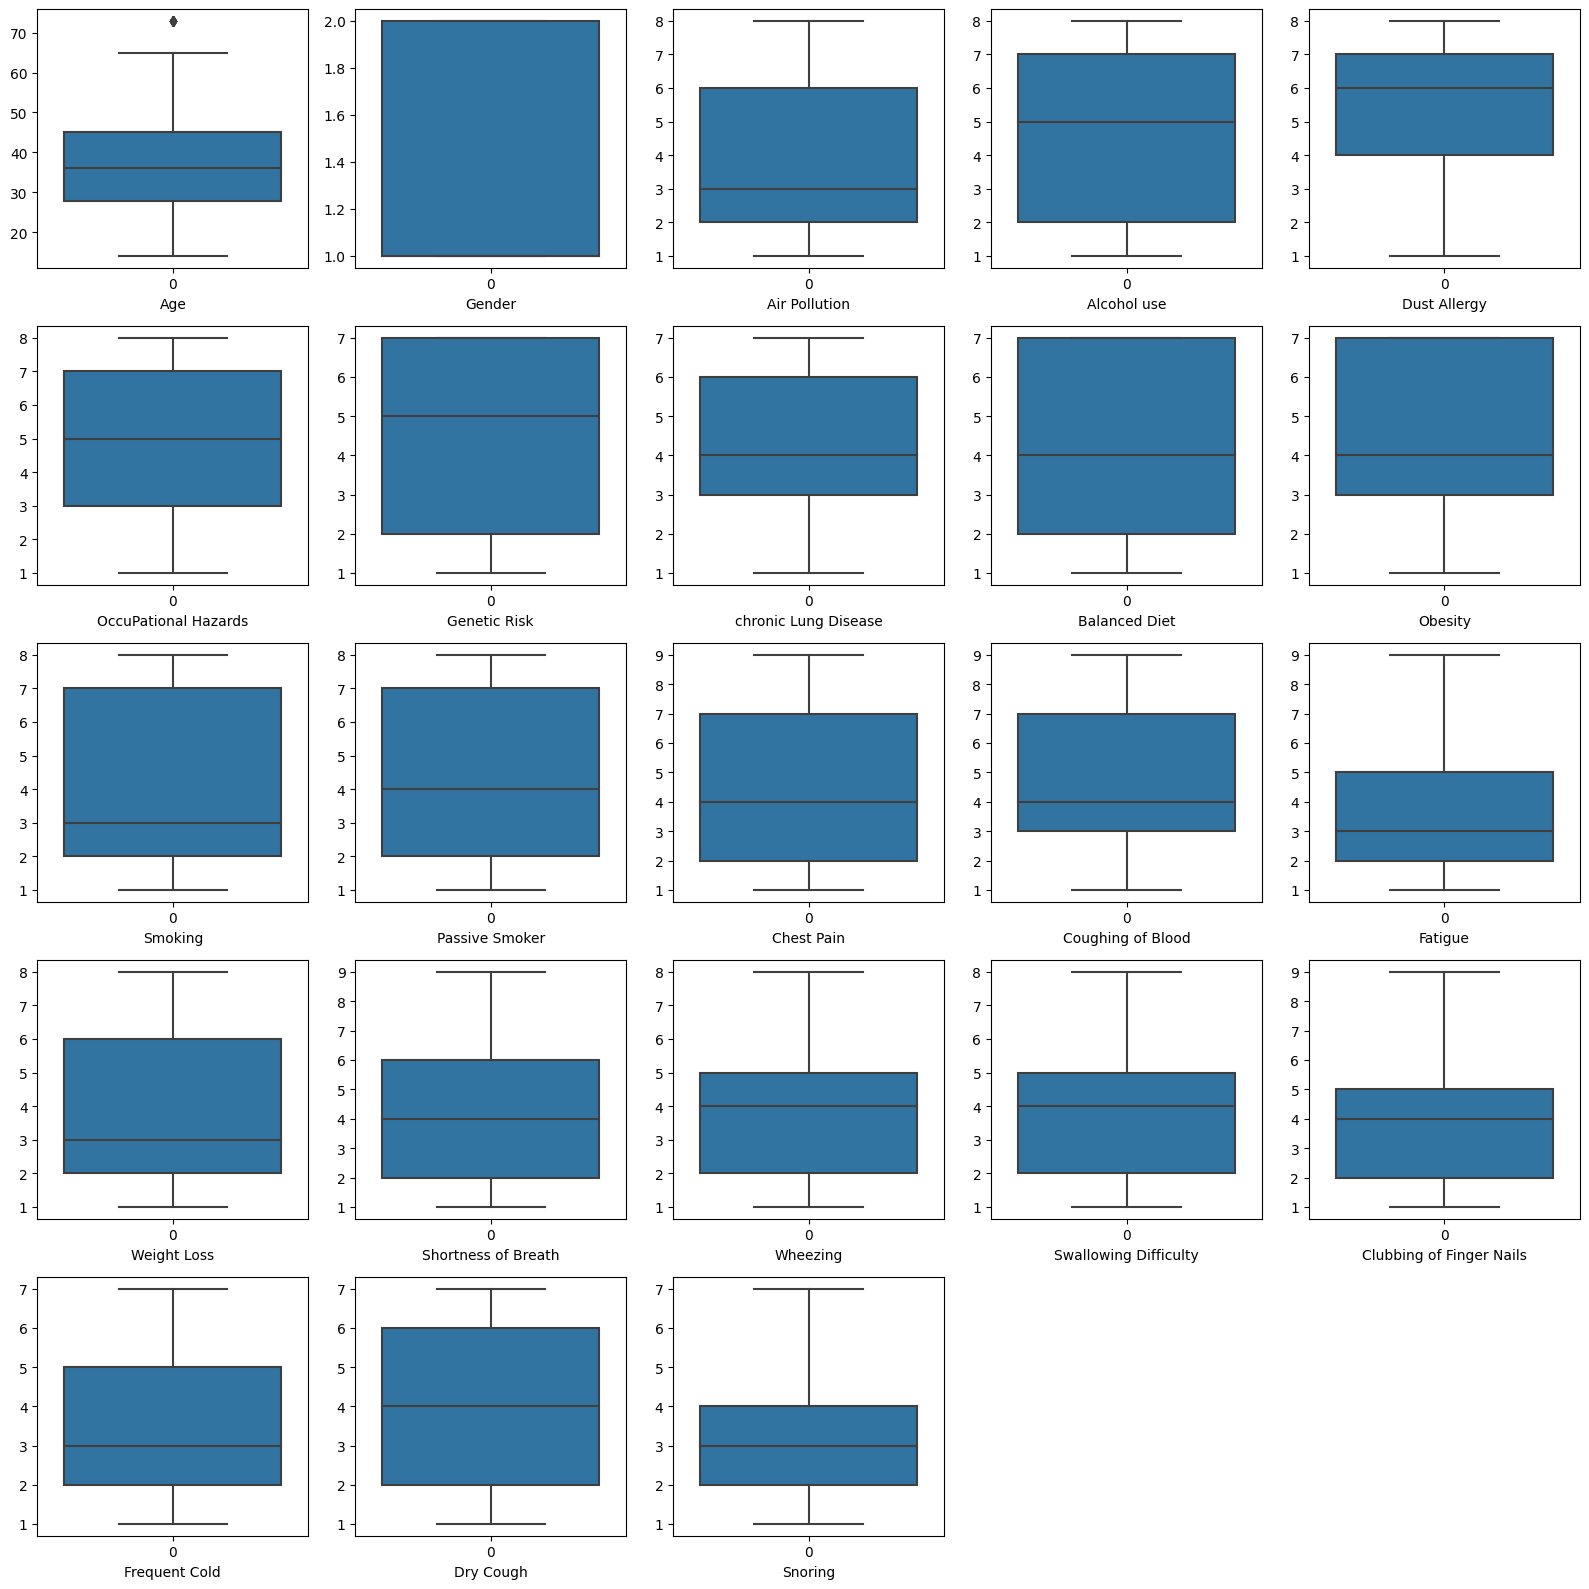

In [ ]:
plt.figure(figsize = (16,16))

for i,j in enumerate(df.select_dtypes(include = "number").columns):

    plt.subplot(5,5,i+1)

    sns.boxplot(df[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

In [ ]:
le = LabelEncoder()
df["Level"] = le.fit_transform(df["Level"])

In [ ]:
model = MinMaxScaler()
df.iloc[:,:-1] = model.fit_transform(df.iloc[:,:-1])

In [ ]:
df = df.astype(int)

In [ ]:
col = list(df.columns)

predictor = col[:-1] #selecting predictor columns
target = col[-1] # selecting target columns

display(predictor, target)

['Age',
 'Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring']

'Level'

In [ ]:
# Splitting datasets into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 0)

display(train, test)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
687,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
332,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
629,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
993,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
553,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
215,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
653,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Importing Machine Learning algorithms
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svm_rbf = SVC(kernel = 'rbf', random_state = 0) #Applying SVM with rbf kernel as hyperparameter
svm_linear = SVC(kernel = 'linear', random_state = 0) #Applying SVM with linear kernel as hyperparameter
svm_poly = SVC(kernel = "poly", random_state = 0) #Applying SVM with poly kernel as hyperparameter
RF = RandomForestClassifier(random_state = 0) #Applying RandomForestClassifier
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 15) #Importing KNN
DT = DecisionTreeClassifier(random_state = 0) # Importing DecisionTreeClassifier
naive_ber = BernoulliNB() #Importing Bernoulli Naive Bayes

model_list = [svm_rbf, svm_linear, svm_poly, RF, knn, DT, naive_ber]
model_list

[SVC(random_state=0),
 SVC(kernel='linear', random_state=0),
 SVC(kernel='poly', random_state=0),
 RandomForestClassifier(random_state=0),
 KNeighborsClassifier(n_jobs=-1, n_neighbors=15),
 DecisionTreeClassifier(random_state=0),
 BernoulliNB()]

In [ ]:
for model in model_list:

    print("{}".format(model))
    model.fit(train[predictor], train[target])

    print("For Test: ")
    test_pred = model.predict(test[predictor])
    display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(test[target], test_pred))

    print("."*30)

    print("For Train: ")
    train_pred = model.predict(train[predictor])
    display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
    print("Accuracy: ", accuracy_score(train[target], train_pred))

    print("*"*30)
    print("*"*30)

SVC(random_state=0)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,66,1
2,0,32,26


Accuracy:  0.75
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,236,0
2,0,130,144


Accuracy:  0.73625
******************************
******************************
SVC(kernel='linear', random_state=0)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,67,0
2,0,32,26


Accuracy:  0.755
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,236,0
2,0,130,144


Accuracy:  0.73625
******************************
******************************
SVC(kernel='poly', random_state=0)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,66,1
2,0,32,26


Accuracy:  0.75
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,236,0
2,0,130,144


Accuracy:  0.73625
******************************
******************************
RandomForestClassifier(random_state=0)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,66,1
2,0,32,26


Accuracy:  0.75
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,236,0
2,0,130,144


Accuracy:  0.73625
******************************
******************************
KNeighborsClassifier(n_jobs=-1, n_neighbors=15)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,62,5
2,0,32,26


Accuracy:  0.73
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,231,5
2,0,130,144


Accuracy:  0.73
******************************
******************************
DecisionTreeClassifier(random_state=0)
For Test: 


Prediction,0,1,2
Actual,,,
0,58,17,0
1,0,67,0
2,0,32,26


Accuracy:  0.755
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,209,81,0
1,0,236,0
2,0,130,144


Accuracy:  0.73625
******************************
******************************
BernoulliNB()
For Test: 


Prediction,0,1,2
Actual,,,
0,56,17,2
1,0,67,0
2,0,32,26


Accuracy:  0.745
..............................
For Train: 


Prediction,0,1,2
Actual,,,
0,201,81,8
1,0,236,0
2,0,130,144


Accuracy:  0.72625
******************************
******************************


# Hyperparameter Tuning

In [ ]:
# Selecting parameters for hyperparameter tuning.
param = {"criterion":["gini", "entropy", "log_loss"],
        "splitter":["best", "random"],
        "max_depth":list(range(1,50)),
        "min_samples_split":list(range(2,50)),
        "min_samples_leaf":list(range(1,50)),
        "max_features":["auto", "sqrt", "log2"],
        "max_leaf_nodes":list(range(1,50))}

In [ ]:
model_RS = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0),
                                param_distributions = param,
                                n_jobs = -1,
                                random_state = 0,
                                cv = 10,
                                scoring = "accuracy",
                                ).fit(train[predictor], train[target])
model_RS

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19, 20,
                                                              21, 22, 23, 24,
                                                              25, 26, 27, 28,
                                                              29, 30, 31, ...],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='accuracy')

In [ ]:
model_RS.best_score_

0.6975

In [ ]:
model = model_RS.best_estimator_
model

DecisionTreeClassifier(criterion='log_loss', max_depth=12, max_features='auto',
                       max_leaf_nodes=14, min_samples_leaf=14,
                       min_samples_split=40, random_state=0)

In [ ]:
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

For Test: 


Prediction,0,1,2
Actual,,,
0,56,17,2
1,0,62,5
2,0,34,24


Accuracy:  0.71
..............................................................
For Train: 


Prediction,0,1,2
Actual,,,
0,201,81,8
1,0,231,5
2,10,138,126


Accuracy:  0.6975


# Logistic Regression


In [ ]:
# Applying Logistic Regression on train data
model = LogisticRegression(random_state = 0, n_jobs = -1).fit(train[predictor], train[target])
model


LogisticRegression(n_jobs=-1, random_state=0)

In [ ]:
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

For Test: 


Prediction,0,1,2
Actual,,,
0,56,17,2
1,0,67,0
2,0,32,26


Accuracy:  0.745
..............................................................
For Train: 


Prediction,0,1,2
Actual,,,
0,201,81,8
1,0,236,0
2,0,130,144


Accuracy:  0.72625


# Multi Layer Perceptron

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape = (train[predictor].shape[1],)),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train[predictor], train[target], epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 1.0711 - accuracy: 0.4328 - val_loss: 1.0385 - val_accuracy: 0.4375
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.9935 - accuracy: 0.5281 - val_loss: 0.9777 - val_accuracy: 0.4938
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.9270 - accuracy: 0.5391 - val_loss: 0.9168 - val_accuracy: 0.4938
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8650 - accuracy: 0.5469 - val_loss: 0.8585 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.8042 - accuracy: 0.5703 - val_loss: 0.7985 - val_accuracy: 0.5562
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7491 - accuracy: 0.6734 - val_loss: 0.7469 - val_accuracy: 0.6938
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.7266 - val_loss: 0.7077 - val_accuracy: 0.6938
Epoch 8/100


In [ ]:
y_pred = model.predict(test[predictor])
y_pred_labels = np.argmax(y_pred, axis = 1)

accuracy = accuracy_score(test[target], y_pred_labels)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 2ms/step
Test Accuracy: 75.50%


Building Neural Network Model

In [ ]:
x = df.drop("Level", axis = 1)
y = pd.get_dummies(df["Level"])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(8, activation = "relu", input_dim = x.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(x, y, epochs = 40, validation_split = 0.3)

Epoch 1/40
22/22 [==============================] - 1s 14ms/step - loss: 1.0766 - accuracy: 0.3543 - val_loss: 1.0633 - val_accuracy: 0.3900
Epoch 2/40
22/22 [==============================] - 0s 5ms/step - loss: 1.0580 - accuracy: 0.3543 - val_loss: 1.0438 - val_accuracy: 0.3900
Epoch 3/40
22/22 [==============================] - 0s 4ms/step - loss: 1.0398 - accuracy: 0.3543 - val_loss: 1.0167 - val_accuracy: 0.3900
Epoch 4/40
22/22 [==============================] - 0s 5ms/step - loss: 1.0134 - accuracy: 0.3529 - val_loss: 0.9837 - val_accuracy: 0.3900
Epoch 5/40
22/22 [==============================] - 0s 4ms/step - loss: 0.9838 - accuracy: 0.4043 - val_loss: 0.9458 - val_accuracy: 0.4633
Epoch 6/40
22/22 [==============================] - 0s 4ms/step - loss: 0.9436 - accuracy: 0.4200 - val_loss: 0.9039 - val_accuracy: 0.4633
Epoch 7/40
22/22 [==============================] - 0s 5ms/step - loss: 0.9063 - accuracy: 0.5257 - val_loss: 0.8606 - val_accuracy: 0.5667
Epoch 8/40
22/22 [=

Checking losses in our neural network model.

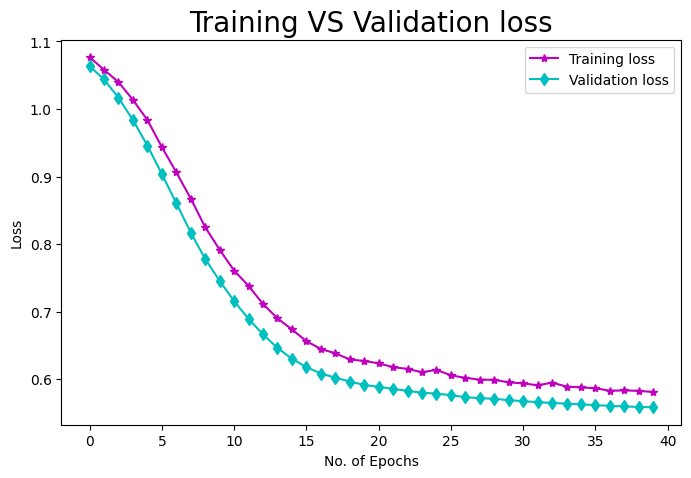

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"], color = "m", label= "Training loss", marker = "*")
plt.plot(history.history["val_loss"], color = "c", label= "Validation loss", marker = "d")
plt.title("Training VS Validation loss", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Checking accuracies in our neural network model.

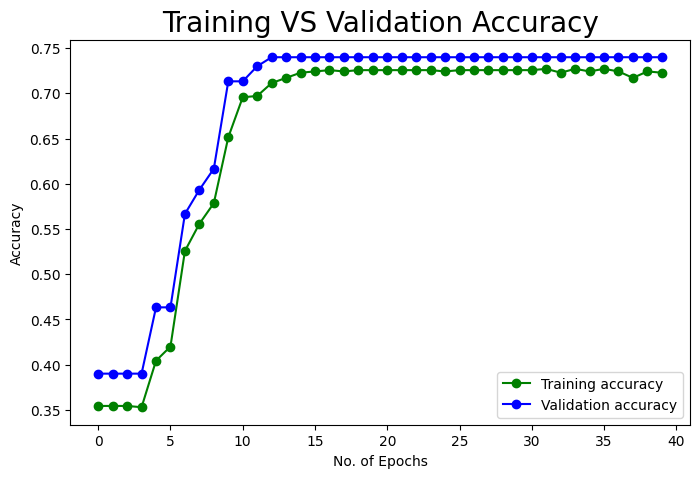

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(history.history["accuracy"], color = "g", label = "Training accuracy", marker = "o")
plt.plot(history.history["val_accuracy"], color = "b", label = "Validation accuracy", marker = "o")
plt.title("Training VS Validation Accuracy", fontsize = 20)
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()